In [ ]:
from pandas import read_csv
import pandas as pd


try:
    fichier = 'pima-indians-diabetes.data.csv'
    col=['NbGrossesse','Glucos','PressArt','AppasPli','Insuline','IMass','Pedigree','Age','Class']
    patient=[f'Patient_{i}' for i in range(1,769)]
    data=read_csv(fichier,names=col,)

    data.index=patient
    pd.set_option('display.max_columns',None)
    pd.set_option('display.float_format',' {:.2f}'.format)
    print (data)
    
except:
    print('Erreur de lecture du fichier')

             NbGrossesse  Glucos  PressArt  AppasPli  Insuline  IMass  \
Patient_1              6     148        72        35         0  33.60   
Patient_2              1      85        66        29         0  26.60   
Patient_3              8     183        64         0         0  23.30   
Patient_4              1      89        66        23        94  28.10   
Patient_5              0     137        40        35       168  43.10   
...                  ...     ...       ...       ...       ...    ...   
Patient_764           10     101        76        48       180  32.90   
Patient_765            2     122        70        27         0  36.80   
Patient_766            5     121        72        23       112  26.20   
Patient_767            1     126        60         0         0  30.10   
Patient_768            1      93        70        31         0  30.40   

             Pedigree  Age  Class  
Patient_1        0.63   50      1  
Patient_2        0.35   31      0  
Patient_3      

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataMl = data.values

X=dataMl[:,:-1]
Y=dataMl[:,-1]
test =0.2
x_train,x_test,y_train,y_test =train_test_split (X,Y,test_size=test)

model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)

NameError: name 'data' is not defined

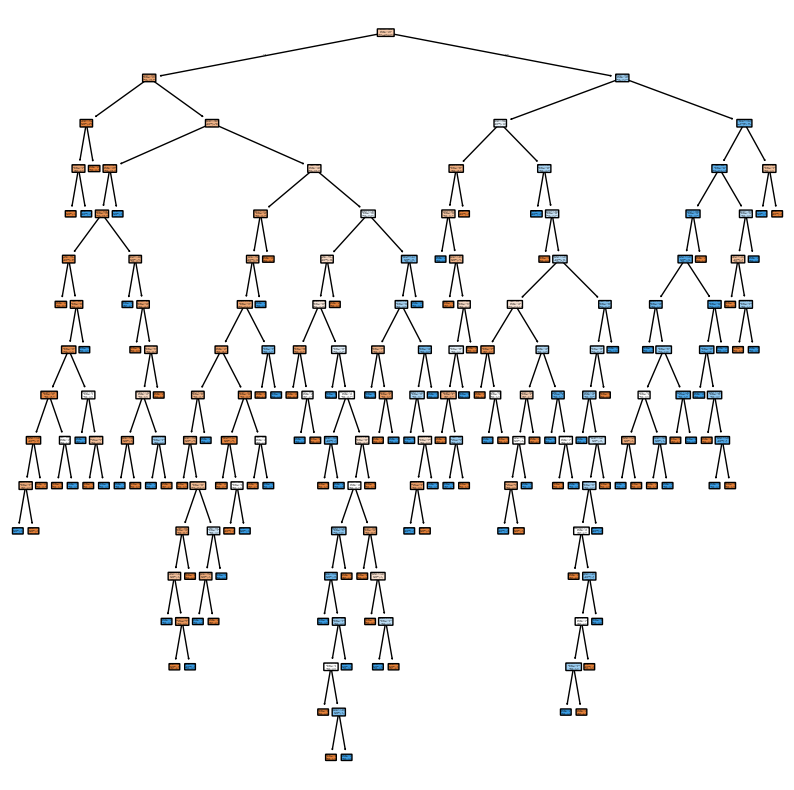

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, feature_names=col, class_names=['Non', 'Oui'],rounded=True, filled=True) 

plt.show()

In [ ]:
# Prediction de l'emsemble des individus de test (x_test)
predictions = model.predict(x_test)

for instance,pred,diag in zip(x_test,predictions,y_test):
    print(f'{instance} --> pred: {pred} VS diag : {diag}')

[1.00e+00 1.73e+02 7.40e+01 0.00e+00 0.00e+00 3.68e+01 8.80e-02 3.80e+01] --> pred: 1.0 VS diag : 1.0
[ 9.    89.    62.     0.     0.    22.5    0.142 33.   ] --> pred: 0.0 VS diag : 0.0
[  0.    124.     70.     20.      0.     27.4     0.254  36.   ] --> pred: 1.0 VS diag : 1.0
[  2.    129.     74.     26.    205.     33.2     0.591  25.   ] --> pred: 0.0 VS diag : 0.0
[ 5.    85.    74.    22.     0.    29.     1.224 32.   ] --> pred: 0.0 VS diag : 1.0
[ 1.    81.    72.    18.    40.    26.6    0.283 24.   ] --> pred: 0.0 VS diag : 0.0
[  8.    151.     78.     32.    210.     42.9     0.516  36.   ] --> pred: 1.0 VS diag : 1.0
[ 8.    91.    82.     0.     0.    35.6    0.587 68.   ] --> pred: 1.0 VS diag : 0.0
[  2.    119.      0.      0.      0.     19.6     0.832  72.   ] --> pred: 0.0 VS diag : 0.0
[  1.    143.     74.     22.     61.     26.2     0.256  21.   ] --> pred: 0.0 VS diag : 0.0
[  0.   137.    70.    38.     0.    33.2    0.17  22.  ] --> pred: 0.0 VS diag : 0.

In [ ]:
# Calcul de l'exactitude (Accuracy) du model
result=model.score(x_test,y_test)

print(f'Accuracy : {round(result-100,2)} %')

Accuracy : -99.23 %


In [ ]:
import pickle

model_name='diabete_arbre.pkl'
pickle.dump(model,open(model_name,'wb'))

In [ ]:

model_name='diabete_arbre.pkl'
loaded_model = pickle.load(open(model_name, 'rb'))

In [ ]:
# Prediction avec le model chargé
import numpy as np

patiente = np.array([10, 139, 80, 0, 0, 27.1, 1.441, 57])

# Prédiction de la classe
pred = int(loaded_model.predict([patiente])[0])
print(pred)

# Prédiction des probabilités (corrigé)
prob = loaded_model.predict_proba([patiente])[0]  # Récupérer les probabilités
print(prob)

print(f'class : {pred}\nProbabilite: {prob[pred] * 100:.2f} %')


0
[1. 0.]
class : 0
Probabilite: 100.00 %


<center> <h1> Cours9:Apprentissage Automatique  </h1> </center>

<h2>1.Evaluation</h2>

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Il manquait cet import

# Prédiction de l'ensemble des individus de test (x_test)
y_pred = model.predict(x_test)

# Matrice de confusion
matrice = confusion_matrix(y_test, y_pred)
print(f"La matrice de confusion\n{matrice}")

# ON L'UTILISE LE JOUR DE L'EXAMEN
def mesures_evaluation(matrice):
    TN, FP, FN, TP = matrice.ravel()
    acc = (TP + TN) / (TN + FP + FN + TP)
    precision = TP / (TP + FP)
    rappel = TP / (TP + FN)  # Correction ici (TP + FN et non TP + FP)
    f1 = (2 * precision * rappel) / (precision + rappel)
    return acc, precision, rappel, f1, TP, FP, FN, TN

acc, precision, rappel, f1, TP, FP, FN, TN = mesures_evaluation(matrice)
print(f'Accuracy : {round(acc * 100, 2)} %')
print(f'Precision : {round(precision * 100, 2)} %')
print(f'Rappel (Recall) : {round(rappel * 100, 2)} %')
print(f'F1-Score : {round(f1 * 100, 2)} %')
print(f'Vrai Positif : {TP}')
print(f'Vrai Négatif : {TN}')
print(f'Faux Positif : {FP}')
print(f'Faux Négatif : {FN}')

# Rapport de classification
rapport = classification_report(y_test, y_pred)
print(f'Rapport de classification:\n{rapport}')

# Affichage de la matrice de confusion
confusion = ConfusionMatrixDisplay(confusion_matrix=matrice)
confusion.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.show()





NameError: name 'model' is not defined

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import pickle




dataML = data.values
#dataML = dataML[:50] prendre les 50 premiers individus
test = 0.2
X=dataML[:,:-1]
Y = dataML[:,-1]
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=test)

model = LogisticRegression(solver='newton-cg')
model.fit(x_train,y_train)


model_name = 'diabete_RegresionLog.pkl'
pickle.dump(model,open(model_name,'wb'))

#prdiction de lensemble des individus de text(x_test)
y_pred =model.predict(x_test)

matrice = confusion_matrix(y_test,y_pred)
print(f"La matrice de confusion\n{matrice}")

#Rapport de classification

rapport =classification_report(y_test,y_pred)
print(f'Rapport de classification:\n{rapport}')

#Afficher la matrice de confusion
confusion = ConfusionMatrixDisplay(confusion_matrix=matrice)
confusion.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

NameError: name 'data' is not defined